In [256]:
#ignore warnings during the execution of my code
import warnings
warnings.filterwarnings('ignore')

In [257]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

In [258]:
# Loading dataset

df = pd.read_csv('day.csv')

In [259]:
# check the head of daatset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect dataframe

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [262]:
df.shape

(730, 16)

In [263]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Checking data quality

In [265]:
#Checking null values for each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [266]:
#after checking column now we can check rows null-value level, we do this to evaluate how many missing values in our dataset
round(100*(df.isnull().sum(axis=1)/len(df)), 2).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [267]:
#The other normal data quality check is to see if there is duplicate entries. 
df.drop_duplicates(subset=None, inplace=True)

In [268]:
df.shape

(730, 16)

Column and row numbers are the same thus there were zero duplicates values in our dataset

We can drop the column that is not helping our analysis and irrevalent columns, we name the new dataframe as df_new

In [271]:
df_new=df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]

In [272]:
#now let's see datatypes of the columns in the new dataframe
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [273]:
# Renaming the columns which makes more sense for viewers
df_new.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity'}, inplace=True)

In [274]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   year        730 non-null    int64  
 2   month       730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [275]:
#Let's make 'season', 'month', 'weekday' and 'weathersit' into category type, so it makes more sense for viewers, here we can make use of mapping or replacing function
df_new.season = df_new.season.map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})


In [276]:
df_new['weekday'].replace([0, 1, 2, 3, 4, 5, 6], ['Sun', 'Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat'], inplace = True)

In [277]:
df_new.month = df_new.month.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'})

In [278]:
df_new.weathersit = df_new.weathersit.map({1:'Clear', 2:'Misty',3:'Light_snowrain', 4:'Heavy_Rain_Storm'})

In [279]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [280]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


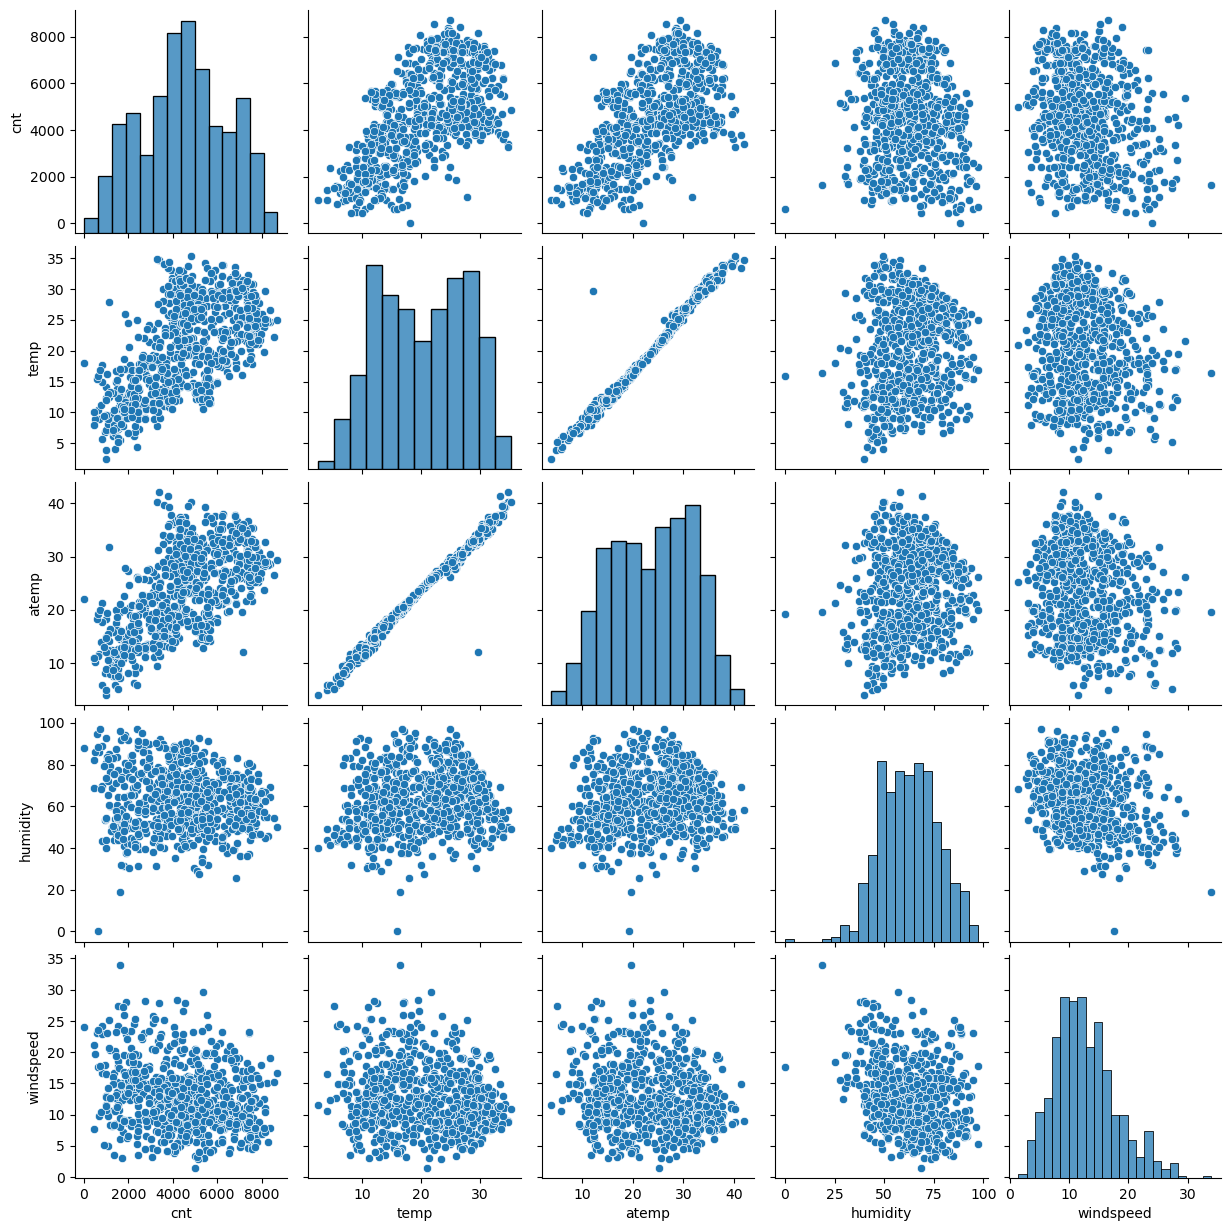

In [281]:
# Now we can start visulizing our datasset, in this dataset we have numeric variables and categroical variables. First we can visualising our numeric variables.
#Let's see these few numeric variables in pairplot 'temp', 'atemp', 'humidity', 'windspeed' and 'cnt'.
sns.pairplot(data=df_new,vars=['cnt', 'temp', 'atemp', 'humidity','windspeed'])
plt.show()

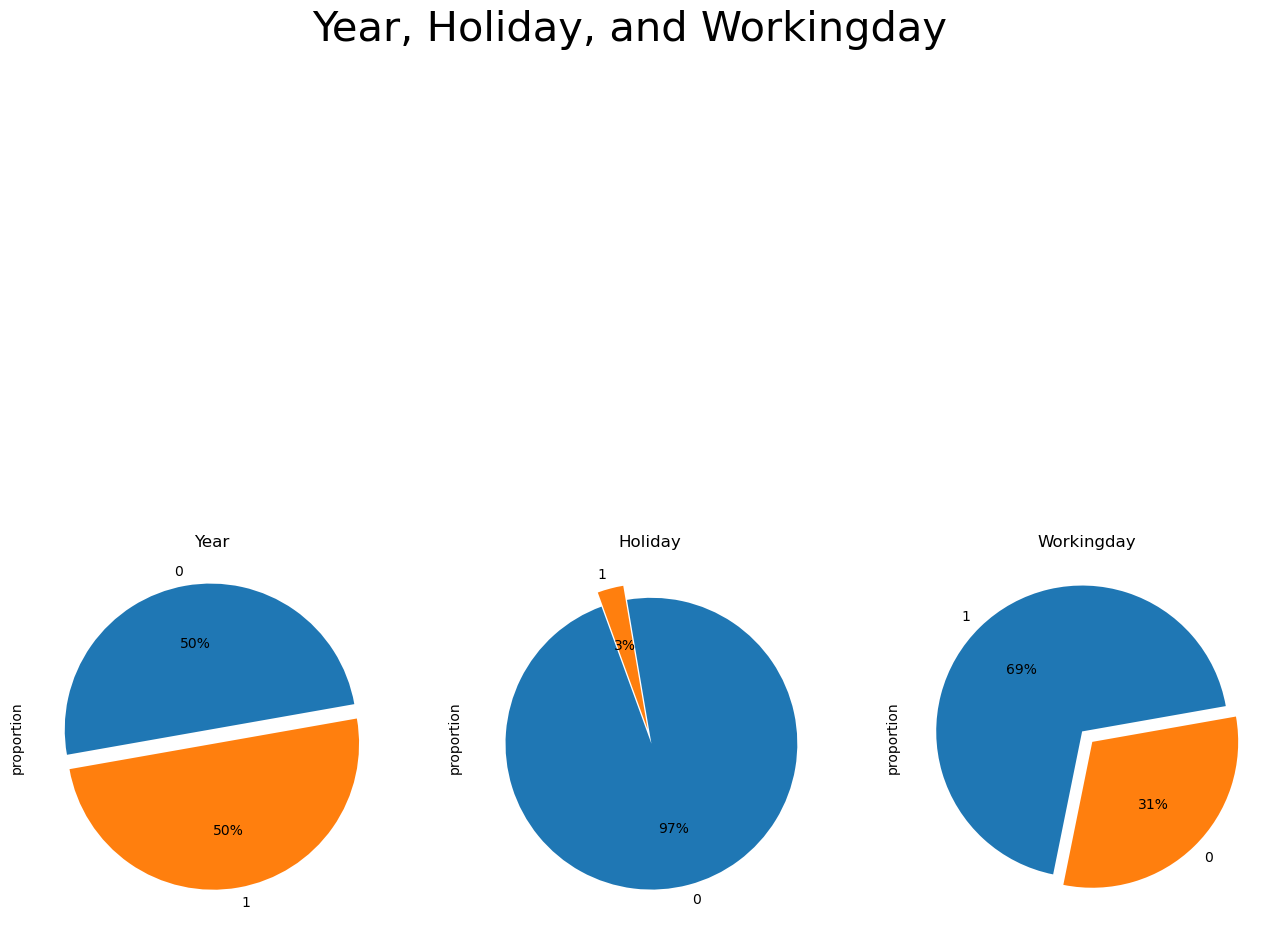

In [282]:
#Visualizing variables: year, holiday and workingday


plt.figure(figsize=(16, 15))

# Pie chart for 'year' variable
plt.subplot(131)
df_new['year'].value_counts(normalize=True).plot.pie(explode=[0.05] * df_new['year'].nunique(), 
                                                     autopct="%1.0f%%", startangle=10)
plt.title('Year')

# Pie chart for 'holiday' variable
plt.subplot(132)
df_new['holiday'].value_counts(normalize=True).plot.pie(explode=[0.05] * df_new['holiday'].nunique(), 
                                                        autopct="%1.0f%%", startangle=110)
plt.title('Holiday')

# Pie chart for 'workingday' variable
plt.subplot(133)
df_new['workingday'].value_counts(normalize=True).plot.pie(explode=[0.05] * df_new['workingday'].nunique(), 
                                                           autopct="%1.0f%%", startangle=10)
plt.title('Workingday')

plt.suptitle('Year, Holiday, and Workingday', fontsize=30)
plt.show()

We can see from variable 'year' usage in year 2018 and 2019 are equally the same. Bikes are used more in workingday and not holiday which shows the conveniency of bike sharing  

<Axes: xlabel='season', ylabel='humidity'>

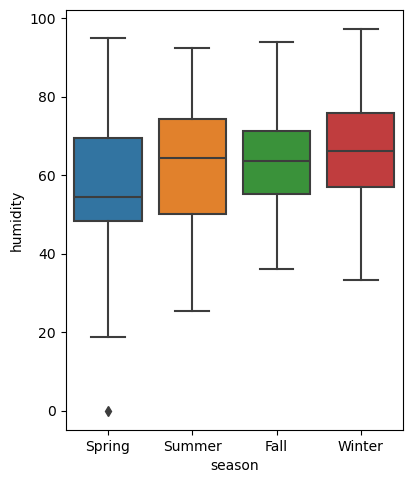

In [284]:
# Now let's see categorical variables
# to see how predictor variable stands against the target variable
# We can see weather information throough visualizing.
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'humidity', data = df_new)

<Axes: xlabel='season', ylabel='atemp'>

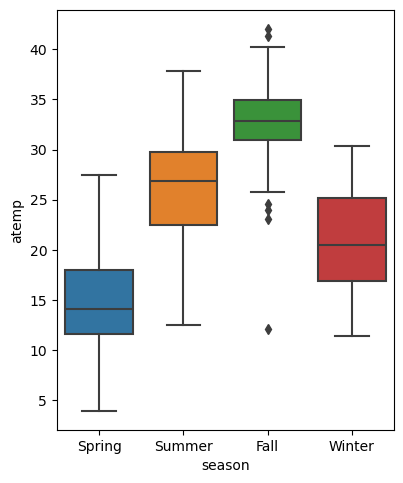

In [285]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'atemp', data = df_new)

<Axes: xlabel='season', ylabel='cnt'>

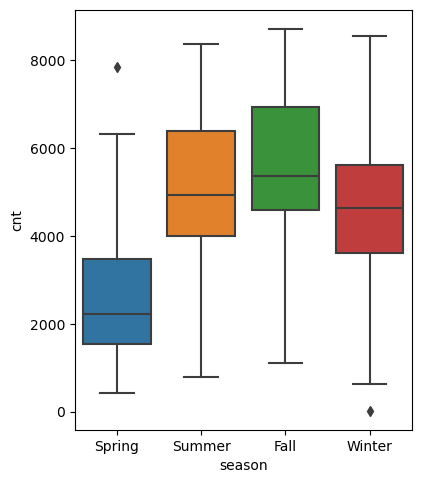

In [286]:
# Now we can see throughout the season the useage of bike sharing
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df_new)

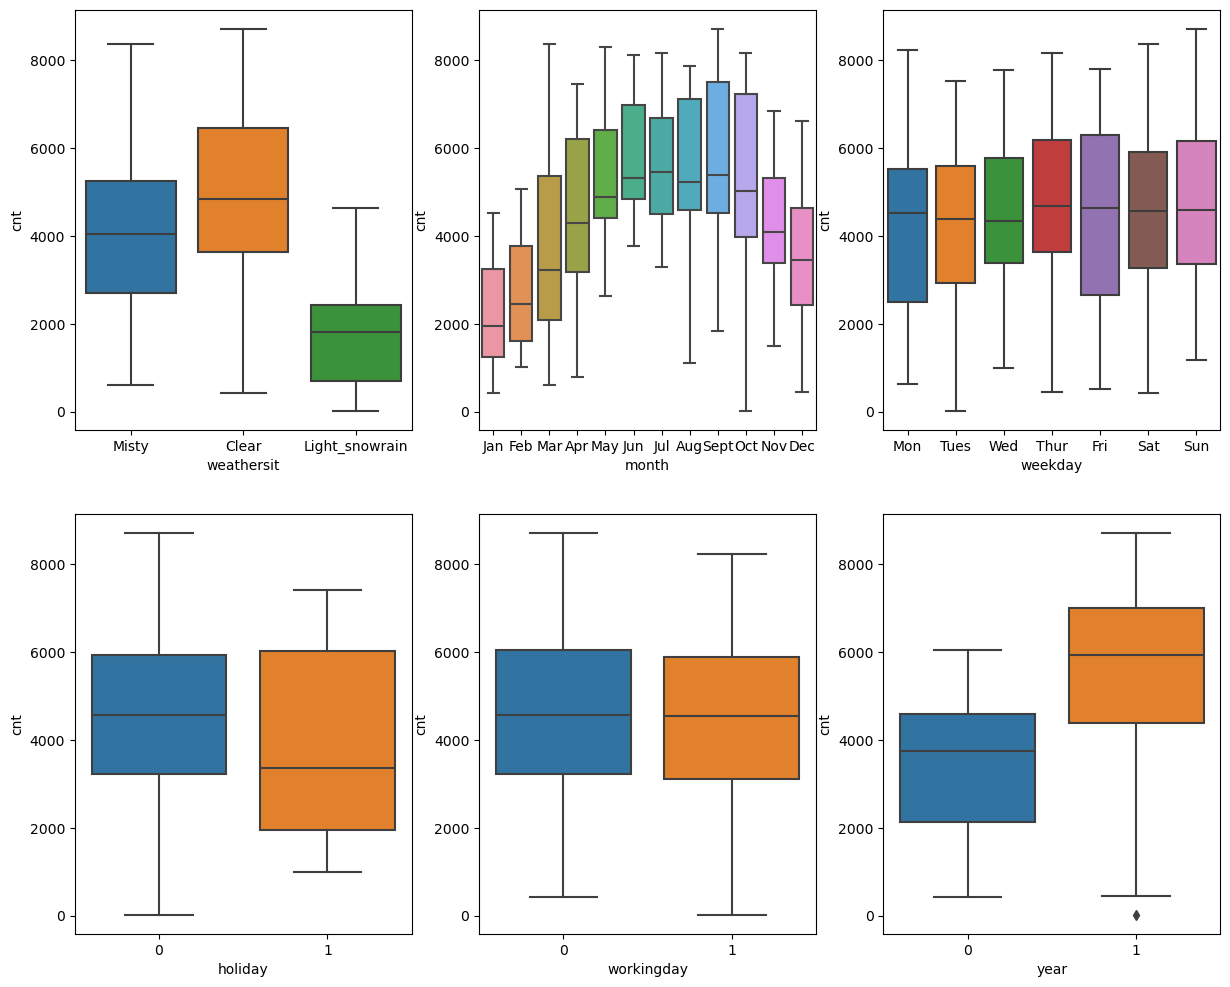

In [287]:
# So as other predict variable against target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df_new)
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df_new)
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df_new)
plt.subplot(2,4,1)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df_new)
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df_new)
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df_new)
plt.show()

When the westher is clear, bike tends to be used which is reaonable. 
Peoples use bike more in fall and not in spring which temperature ('atemp') factor can explains that temperature in springer is lower


Correlation Matrix

In [290]:
corr_matrix = df.drop(columns=['dteday']).corr()
display(corr_matrix)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,4.135867e-01,8.660262e-01,4.982507e-01,0.016275,-0.001182,-0.015171,-0.021862,0.150738,0.152773,0.016080,-0.112667,0.275604,0.660544,0.629896
season,0.413587,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.208737,0.410310,0.404584
yr,0.866026,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
mnth,0.498251,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.121208,0.291952,0.278191
holiday,0.016275,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
weekday,-0.001182,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,-0.350848,0.199326,0.036183
workingday,-0.015171,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
weathersit,-0.021862,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.246044,-0.259025,-0.295929
temp,0.150738,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.152773,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685


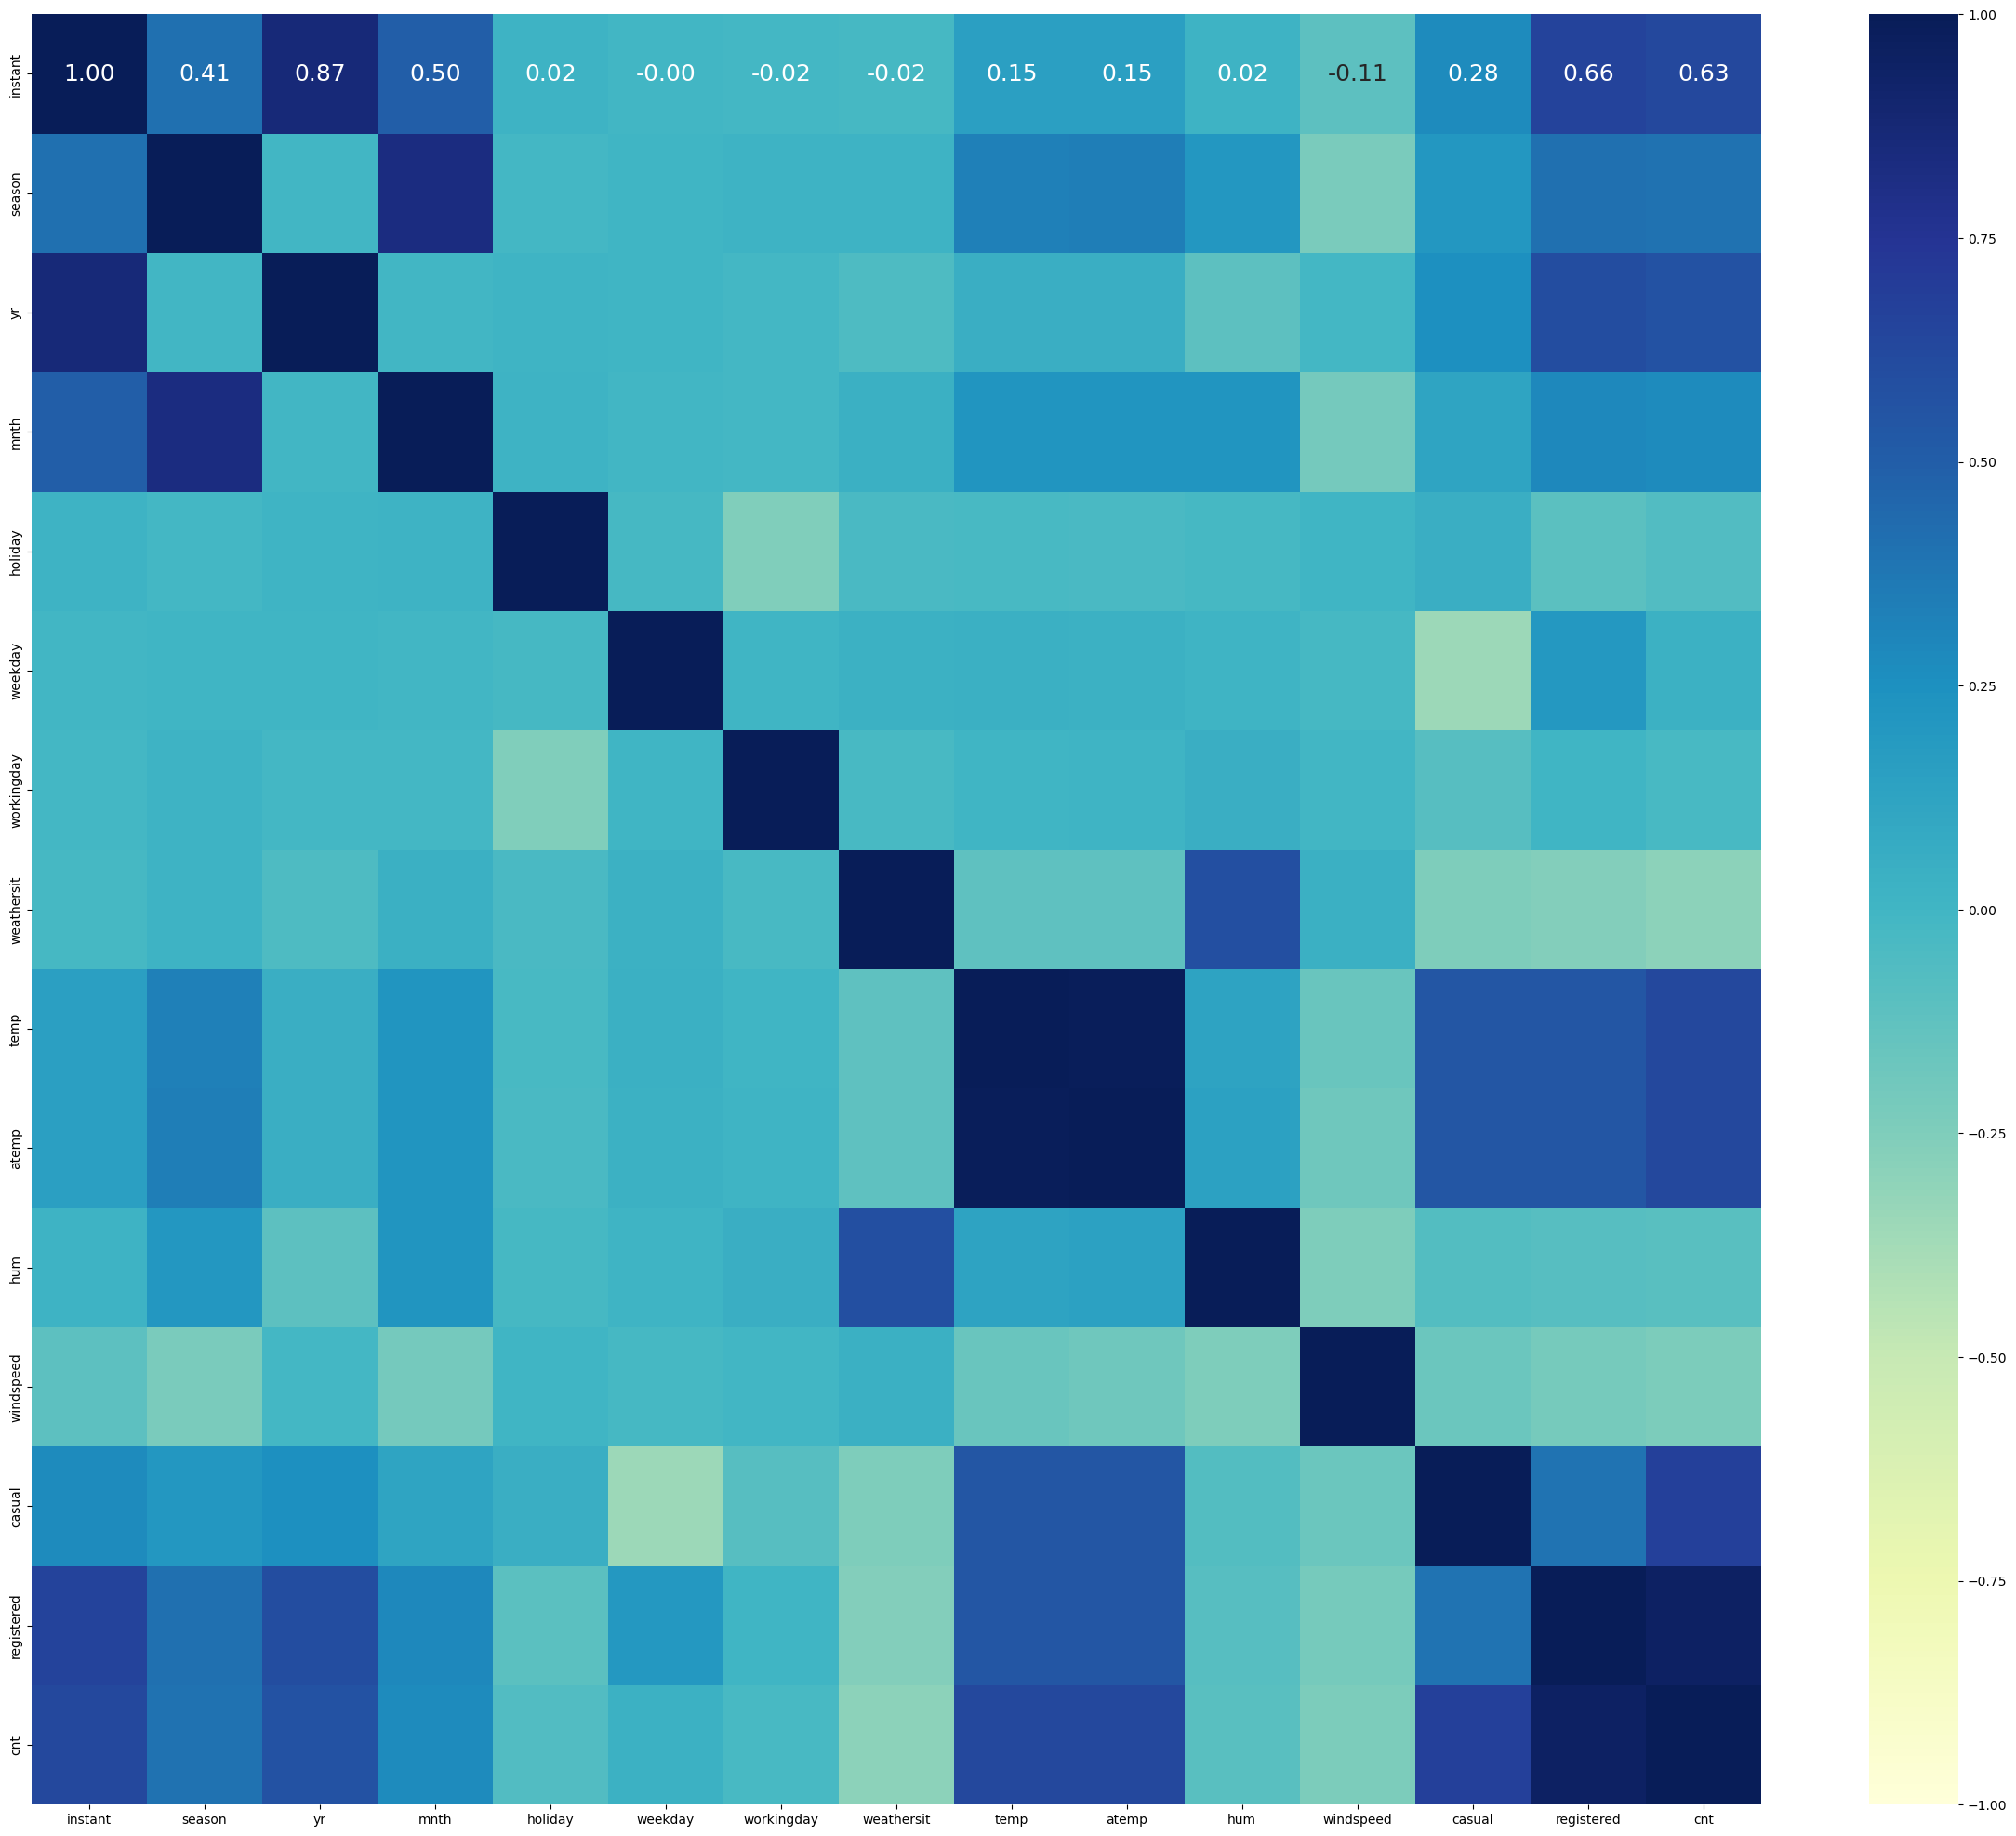

In [291]:
plt.figure(figsize=(30, 25))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="YlGnBu", annot_kws={"size": 18}, vmin=-1, vmax=1)

plt.show()

Dummy Variables

In [293]:
df_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,Spring,0,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [294]:
# creating dummy variables for our categorical variables: season, month, weathersit and weekday
dummy = df_new[['season','month','weekday','weathersit']]

In [295]:
dummy = pd.get_dummies(dummy,drop_first=True ).astype(int)

In [296]:
dummy_data = pd.concat([dummy,df_new],axis = 1)

In [297]:
dummy_data.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Mon,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tues,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wed,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Thur,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Fri,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [298]:
dummy_data.drop(['season', 'month', 'weekday','weathersit'], axis = 1, inplace = True)

In [299]:
dummy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              730 non-null    int32  
 1   season_Summer              730 non-null    int32  
 2   season_Winter              730 non-null    int32  
 3   month_Aug                  730 non-null    int32  
 4   month_Dec                  730 non-null    int32  
 5   month_Feb                  730 non-null    int32  
 6   month_Jan                  730 non-null    int32  
 7   month_Jul                  730 non-null    int32  
 8   month_Jun                  730 non-null    int32  
 9   month_Mar                  730 non-null    int32  
 10  month_May                  730 non-null    int32  
 11  month_Nov                  730 non-null    int32  
 12  month_Oct                  730 non-null    int32  
 13  month_Sept                 730 non-null    int32  

In [300]:
# splitting the dataframe into Train and Test

df_train, df_test = train_test_split(dummy_data, train_size = 0.7, random_state = 100)

In [301]:
# Let's prepare features for our sets

scaler = MinMaxScaler()

In [302]:
# Apply scaler() to all the columns except the 'dummy' variables.
num_vars = ['cnt','humidity','windspeed','temp','atemp']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [303]:
df_train.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light_snowrain,weathersit_Misty,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095


In [304]:
# Let's check the correlation coefficients to see which variables are highly correlated

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              510 non-null    int32  
 1   season_Summer              510 non-null    int32  
 2   season_Winter              510 non-null    int32  
 3   month_Aug                  510 non-null    int32  
 4   month_Dec                  510 non-null    int32  
 5   month_Feb                  510 non-null    int32  
 6   month_Jan                  510 non-null    int32  
 7   month_Jul                  510 non-null    int32  
 8   month_Jun                  510 non-null    int32  
 9   month_Mar                  510 non-null    int32  
 10  month_May                  510 non-null    int32  
 11  month_Nov                  510 non-null    int32  
 12  month_Oct                  510 non-null    int32  
 13  month_Sept                 510 non-null    int32  
 1

In [305]:
corr_matrix1 = df_train.corr()
display(corr_matrix1)

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light_snowrain,weathersit_Misty,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
season_Spring,1.000000,-0.324666,-0.324666,-0.184784,0.041868,4.715403e-01,0.548861,-0.163094,-0.163094,0.305009,...,-4.455809e-02,0.011613,-0.036320,0.053339,-0.032886,-0.606396,-0.611118,-0.201616,0.180351,-0.548987
season_Summer,-0.324666,1.000000,-0.328125,-0.186753,-0.173818,-1.530931e-01,-0.178197,-0.164832,0.262846,0.086333,...,-4.590079e-02,0.043202,0.018294,-0.063798,0.033299,0.126057,0.136550,-0.014192,0.110441,0.140259
season_Winter,-0.324666,-0.328125,1.000000,-0.186753,0.317031,-1.530931e-01,-0.178197,-0.164832,-0.164832,-0.188854,...,1.155434e-01,0.024076,-0.027174,0.051582,0.033299,-0.234200,-0.211852,0.173980,-0.090740,0.025945
month_Aug,-0.184784,-0.186753,-0.186753,1.000000,-0.098929,-8.713318e-02,-0.101421,-0.093814,-0.093814,-0.107486,...,-5.675323e-02,0.015258,0.054774,-0.052728,-0.012875,0.387176,0.359727,0.052949,-0.111460,0.227578
month_Dec,0.041868,-0.173818,0.317031,-0.098929,1.000000,-8.109830e-02,-0.094396,-0.087317,-0.087317,-0.100042,...,-1.105587e-02,0.017231,-0.040049,-0.004302,-0.025020,-0.273091,-0.262072,0.057615,-0.061179,-0.143546
month_Feb,0.471540,-0.153093,-0.153093,-0.087133,-0.081098,1.000000e+00,-0.083141,-0.076906,-0.076906,-0.088113,...,-3.070888e-17,-0.012125,-0.019916,0.056524,-0.003471,-0.296213,-0.299686,-0.129780,0.132936,-0.270351
month_Jan,0.548861,-0.178197,-0.178197,-0.101421,-0.094396,-8.314110e-02,1.000000,-0.089516,-0.089516,-0.102562,...,-5.415304e-02,0.065009,-0.011794,0.037412,-0.015711,-0.446941,-0.451026,-0.071906,0.006582,-0.378296
month_Jul,-0.163094,-0.164832,-0.164832,-0.093814,-0.087317,-7.690558e-02,-0.089516,1.000000,-0.082803,-0.094870,...,-6.422000e-03,-0.115763,0.017623,-0.046539,-0.012361,0.413678,0.406832,-0.054070,-0.085671,0.158087
month_Jun,-0.163094,0.262846,-0.164832,-0.093814,-0.087317,-7.690558e-02,-0.089516,-0.082803,1.000000,-0.094870,...,-5.009160e-02,-0.084722,0.017623,-0.046539,0.036508,0.301219,0.293970,-0.095077,-0.033103,0.195411
month_Mar,0.305009,0.086333,-0.188854,-0.107486,-0.100042,-8.811342e-02,-0.102562,-0.094870,-0.094870,1.000000,...,2.066101e-02,-0.003535,-0.005172,-0.053321,-0.008563,-0.179941,-0.178698,-0.111040,0.141944,-0.137465


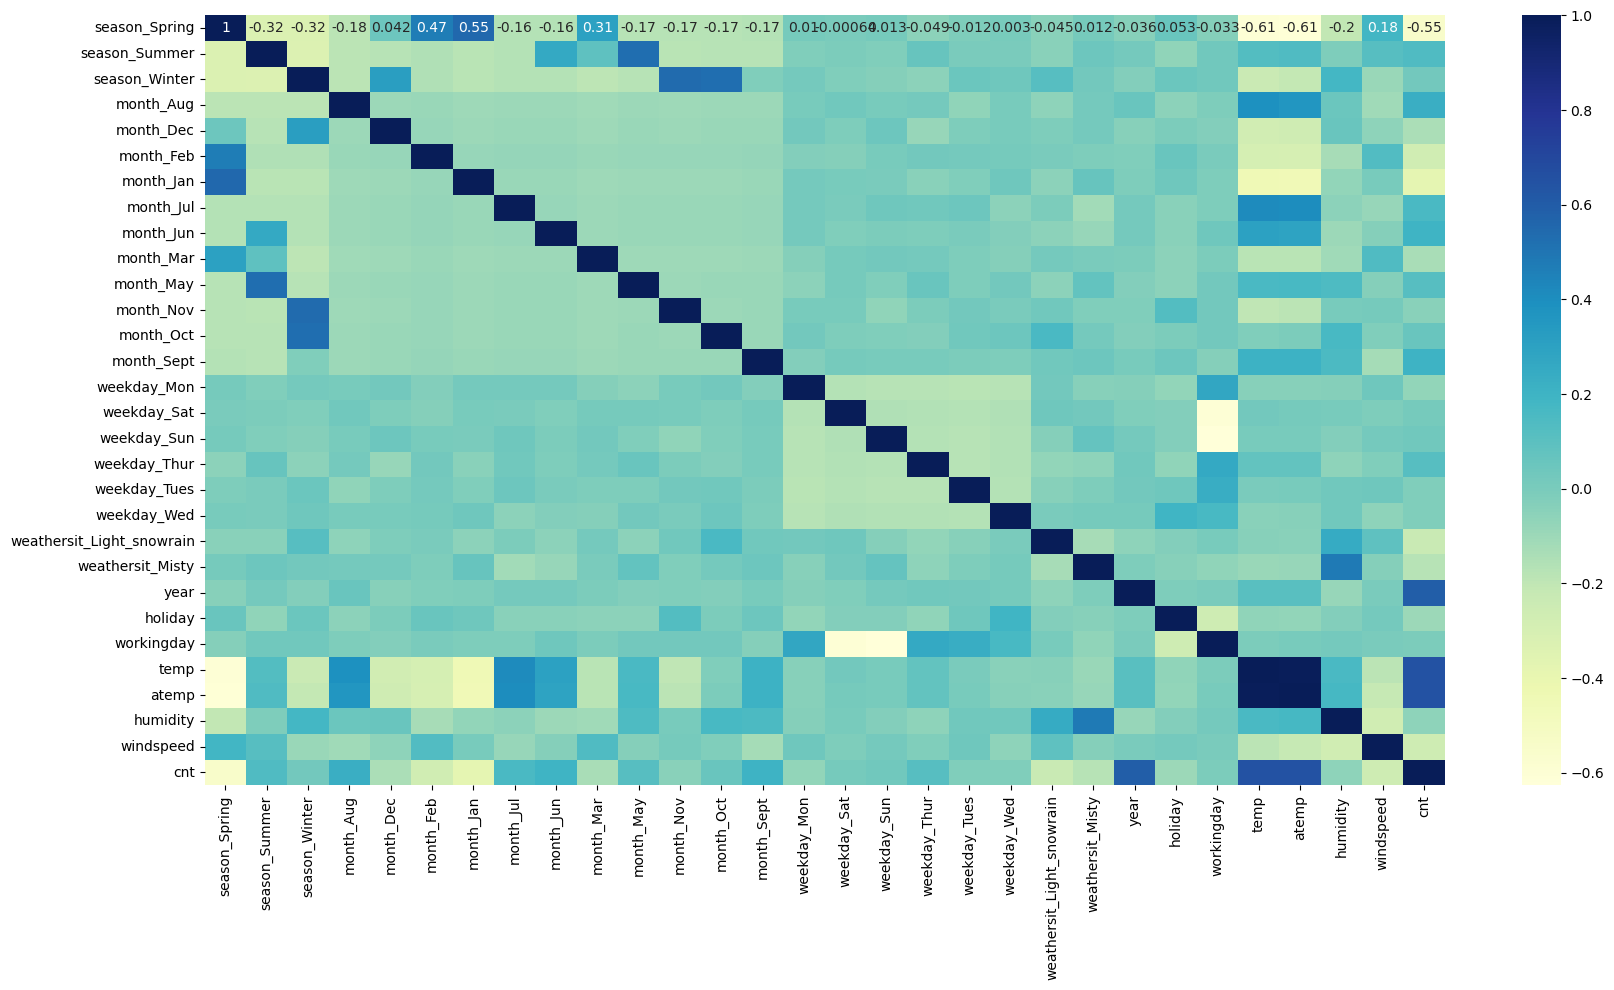

In [306]:
#Let's check correlation of our training dataset

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [307]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              510 non-null    int32  
 1   season_Summer              510 non-null    int32  
 2   season_Winter              510 non-null    int32  
 3   month_Aug                  510 non-null    int32  
 4   month_Dec                  510 non-null    int32  
 5   month_Feb                  510 non-null    int32  
 6   month_Jan                  510 non-null    int32  
 7   month_Jul                  510 non-null    int32  
 8   month_Jun                  510 non-null    int32  
 9   month_Mar                  510 non-null    int32  
 10  month_May                  510 non-null    int32  
 11  month_Nov                  510 non-null    int32  
 12  month_Oct                  510 non-null    int32  
 13  month_Sept                 510 non-null    int32  
 1

In [308]:
#To build linear model, we need to divide traing set into X and Y sets
x_train = df_train
y_train = df_train.pop('cnt')

In statsmodels, when we fit a regression line, we need to add a constant term to our data using sm.add_constant(X). This constant represents the "intercept" of the line, which is where the line crosses the y-axis (the vertical line at x = 0).

If we don’t add this constant, statsmodels will assume the line goes through the origin (meaning it starts at 0 on both axes), which may not be accurate for our data. Adding the constant allows the line to start at a different point on the y-axis, giving us a better fit for our data.

In [310]:
# Running RFE with the output number of the variable equal to 17
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Initialize the Linear Regression model
lm = LinearRegression()

# Fit the model to the data
lm.fit(x_train, y_train)

# Run RFE, specifying the number of features to select
rfe = RFE(estimator=lm, n_features_to_select=17)
rfe = rfe.fit(x_train, y_train)

In [311]:
#Selected columns and their weights from RFE
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('month_Aug', False, 8),
 ('month_Dec', True, 1),
 ('month_Feb', True, 1),
 ('month_Jan', True, 1),
 ('month_Jul', True, 1),
 ('month_Jun', False, 10),
 ('month_Mar', False, 13),
 ('month_May', False, 7),
 ('month_Nov', True, 1),
 ('month_Oct', False, 11),
 ('month_Sept', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 3),
 ('weekday_Sun', False, 4),
 ('weekday_Thur', False, 12),
 ('weekday_Tues', False, 5),
 ('weekday_Wed', False, 9),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1),
 ('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1)]

In [312]:
col = x_train.columns[rfe.support_]
col

Index(['season_Spring', 'season_Summer', 'season_Winter', 'month_Dec',
       'month_Feb', 'month_Jan', 'month_Jul', 'month_Nov', 'month_Sept',
       'weathersit_Light_snowrain', 'weathersit_Misty', 'year', 'holiday',
       'temp', 'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [313]:
x_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Jun', 'month_Mar', 'month_May', 'month_Oct',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thur',
       'weekday_Tues', 'weekday_Wed', 'workingday'],
      dtype='object')

In [314]:
#Now creating x_test dataframe with selected variables by RFE
x_train_rfe = x_train[col]

Using Stats model - Model 1

Using RFE technique to select the most important features and then we use VIF check to find score tells us how much a feature is influenced by other features

In [317]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(x_train_rfe.values, i) for i in range(x_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,376.98
14,atemp,368.58
15,humidity,31.57
0,season_Spring,5.56
16,windspeed,4.98
2,season_Winter,4.22
1,season_Summer,2.95
5,month_Jan,2.38
10,weathersit_Misty,2.33
11,year,2.09


If the VIF of a variable is more than 5 (or sometimes 10, depending on your limit), it means there is high multicollinearity. This means the variable is very similar to other variables. High multicollinearity can make the model less stable, make the coefficients hard to understand, and lead to less reliable predictions.

In [319]:
#Adding a constant puts an intercept in the model. This lets the regression line start at a point on the y-axis instead of at zero. It makes the model more flexible and better at fitting the data. Building a fitted model means using the training data to find the best line and review the coefficients and intercept from the fitted model.
x_train_lm_1 = sm.add_constant(x_train_rfe)
lr_1 = sm.OLS(y_train,x_train_lm_1).fit()
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     158.7
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          3.85e-187
Time:                        02:52:51   Log-Likelihood:                 515.58
No. Observations:                 510   AIC:                            -995.2
Df Residuals:                     492   BIC:                            -918.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3314      0.037      9.014      0.000       0.259       0.404
season_Spring                -0.0519      0.022     -2.330      0.020      -0.096      -0.008
season_Summer                 0.0386      0.016      2.450      0.015       0.008       0.070
season_Winter                 0.0997      0.018      5.436      0.000       0.064       0.136
month_Dec                    -0.0447      0.018     -2.429      0.015      -0.081      -0.009
month_Feb                    -0.0355      0.022     -1.634      0.103      -0.078       0.007
month_Jan                    -0.0623      0.022     -2.893      0.004      -0.105      -0.020
month_Jul                    -0.0544      0.018     -2.979      0.003      -0.090      -0.019
month_Nov                    -0.0435      0.019     -2.288      0.023      -0.081      -0.006
month_Sept                    0.0738      0.017      4.355      0.000       0.041       0.107
weathersit_Light_snowrain    -0.2476      0.026     -9.353      0.000      -0.300      -0.196
weathersit_Misty             -0.0546      0.010     -5.220      0.000      -0.075      -0.034
year                          0.2308      0.008     28.541      0.000       0.215       0.247
holiday                      -0.0885      0.026     -3.450      0.001      -0.139      -0.038
temp                          0.4484      0.135      3.314      0.001       0.183       0.714
atemp                         0.0183      0.137      0.133      0.894      -0.251       0.288
humidity                     -0.1604      0.038     -4.239      0.000      -0.235      -0.086
windspeed                    -0.1892      0.026     -7.199      0.000      -0.241      -0.138
==============================================================================
Omnibus:                       71.293   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.804
Skew:                          -0.725   Prob(JB):                     2.99e-38
Kurtosis:                       5.455   Cond. No.                         79.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 2

By building second Model, we can remove variable with high VIF value like 'atemp', 'temp' also has high VIF value but as a general variable quite important for peoples riding a bike so we probably like to keep it.

In [322]:
x_train_new = x_train_rfe.drop(["atemp"], axis =1)

In [323]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,humidity,31.52
13,temp,18.33
0,season_Spring,5.45
15,windspeed,4.73
2,season_Winter,4.07
1,season_Summer,2.82
5,month_Jan,2.38
10,weathersit_Misty,2.33
11,year,2.09
4,month_Feb,1.92


In [324]:
x_train_lm_2 = sm.add_constant(x_train_new)
lr_2 = sm.OLS(y_train,x_train_lm_2).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.0
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          2.94e-188
Time:                        02:52:51   Log-Likelihood:                 515.57
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     493   BIC:                            -925.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.3313      0.037      9.023      0.000       0.259       0.403
season_Spring                -0.0515      0.022     -2.336      0.020      -0.095      -0.008
season_Summer                 0.0391      0.015      2.530      0.012       0.009       0.069
season_Winter                 0.1002      0.018      5.560      0.000       0.065       0.136
month_Dec                    -0.0446      0.018     -2.431      0.015      -0.081      -0.009
month_Feb                    -0.0355      0.022     -1.636      0.102      -0.078       0.007
month_Jan                    -0.0624      0.022     -2.901      0.004      -0.105      -0.020
month_Jul                    -0.0543      0.018     -2.980      0.003      -0.090      -0.018
month_Nov                    -0.0435      0.019     -2.289      0.023      -0.081      -0.006
month_Sept                    0.0740      0.017      4.378      0.000       0.041       0.107
weathersit_Light_snowrain    -0.2479      0.026     -9.395      0.000      -0.300      -0.196
weathersit_Misty             -0.0546      0.010     -5.231      0.000      -0.075      -0.034
year                          0.2308      0.008     28.570      0.000       0.215       0.247
holiday                      -0.0887      0.026     -3.462      0.001      -0.139      -0.038
temp                          0.4657      0.038     12.188      0.000       0.391       0.541
humidity                     -0.1602      0.038     -4.242      0.000      -0.234      -0.086
windspeed                    -0.1899      0.026     -7.371      0.000      -0.241      -0.139
==============================================================================
Omnibus:                       71.068   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              172.175
Skew:                          -0.723   Prob(JB):                     4.10e-38
Kurtosis:                       5.451   Cond. No.                         21.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 3
We can remove next high VIF variable - humidity

In [326]:
x_train_new = x_train_new.drop(["humidity"], axis =1)
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              510 non-null    int32  
 1   season_Summer              510 non-null    int32  
 2   season_Winter              510 non-null    int32  
 3   month_Dec                  510 non-null    int32  
 4   month_Feb                  510 non-null    int32  
 5   month_Jan                  510 non-null    int32  
 6   month_Jul                  510 non-null    int32  
 7   month_Nov                  510 non-null    int32  
 8   month_Sept                 510 non-null    int32  
 9   weathersit_Light_snowrain  510 non-null    int32  
 10  weathersit_Misty           510 non-null    int32  
 11  year                       510 non-null    int64  
 12  holiday                    510 non-null    int64  
 13  temp                       510 non-null    float64
 1

In [327]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,5.22
14,windspeed,4.67
0,season_Spring,4.33
2,season_Winter,2.99
1,season_Summer,2.24
5,month_Jan,2.21
11,year,2.08
4,month_Feb,1.88
7,month_Nov,1.83
6,month_Jul,1.60


In [328]:
x_train_lm_3 = sm.add_constant(x_train_new)
lr_3 = sm.OLS(y_train,x_train_lm_3).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     173.1
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          1.44e-185
Time:                        02:52:51   Log-Likelihood:                 506.43
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     494   BIC:                            -913.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2587      0.033      7.830      0.000       0.194       0.324
season_Spring                -0.0605      0.022     -2.712      0.007      -0.104      -0.017
season_Summer                 0.0314      0.016      2.015      0.044       0.001       0.062
season_Winter                 0.0852      0.018      4.741      0.000       0.050       0.121
month_Dec                    -0.0527      0.019     -2.835      0.005      -0.089      -0.016
month_Feb                    -0.0385      0.022     -1.749      0.081      -0.082       0.005
month_Jan                    -0.0706      0.022     -3.238      0.001      -0.113      -0.028
month_Jul                    -0.0491      0.018     -2.654      0.008      -0.085      -0.013
month_Nov                    -0.0447      0.019     -2.314      0.021      -0.083      -0.007
month_Sept                    0.0672      0.017      3.927      0.000       0.034       0.101
weathersit_Light_snowrain    -0.2927      0.025    -11.899      0.000      -0.341      -0.244
weathersit_Misty             -0.0800      0.009     -9.213      0.000      -0.097      -0.063
year                          0.2348      0.008     28.781      0.000       0.219       0.251
holiday                      -0.0891      0.026     -3.421      0.001      -0.140      -0.038
temp                          0.4221      0.037     11.277      0.000       0.349       0.496
windspeed                    -0.1602      0.025     -6.353      0.000      -0.210      -0.111
==============================================================================
Omnibus:                       73.963   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              185.022
Skew:                          -0.740   Prob(JB):                     6.65e-41
Kurtosis:                       5.552   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 4 - 
ALthough 'windspeed' is not over 5 but VIF is also quite high, to get a more precise result, we should consider dropping this too. 

In [330]:
x_train_new = x_train_new.drop(["windspeed"], axis =1)
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              510 non-null    int32  
 1   season_Summer              510 non-null    int32  
 2   season_Winter              510 non-null    int32  
 3   month_Dec                  510 non-null    int32  
 4   month_Feb                  510 non-null    int32  
 5   month_Jan                  510 non-null    int32  
 6   month_Jul                  510 non-null    int32  
 7   month_Nov                  510 non-null    int32  
 8   month_Sept                 510 non-null    int32  
 9   weathersit_Light_snowrain  510 non-null    int32  
 10  weathersit_Misty           510 non-null    int32  
 11  year                       510 non-null    int64  
 12  holiday                    510 non-null    int64  
 13  temp                       510 non-null    float64
dt

In [331]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,temp,4.34
0,season_Spring,3.63
2,season_Winter,2.86
5,month_Jan,2.21
11,year,2.07
1,season_Summer,1.95
4,month_Feb,1.88
7,month_Nov,1.81
6,month_Jul,1.60
10,weathersit_Misty,1.57


In [332]:
x_train_lm_4 = sm.add_constant(x_train_new)
lr_4 = sm.OLS(y_train,x_train_lm_4).fit()
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     169.1
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          2.61e-178
Time:                        02:52:52   Log-Likelihood:                 486.40
No. Observations:                 510   AIC:                            -942.8
Df Residuals:                     495   BIC:                            -879.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1948      0.033      5.960      0.000       0.131       0.259
season_Spring                -0.0739      0.023     -3.202      0.001      -0.119      -0.029
season_Summer                 0.0236      0.016      1.460      0.145      -0.008       0.055
season_Winter                 0.0888      0.019      4.758      0.000       0.052       0.125
month_Dec                    -0.0416      0.019     -2.163      0.031      -0.079      -0.004
month_Feb                    -0.0331      0.023     -1.446      0.149      -0.078       0.012
month_Jan                    -0.0508      0.022     -2.268      0.024      -0.095      -0.007
month_Jul                    -0.0503      0.019     -2.621      0.009      -0.088      -0.013
month_Nov                    -0.0460      0.020     -2.292      0.022      -0.086      -0.007
month_Sept                    0.0727      0.018      4.094      0.000       0.038       0.108
weathersit_Light_snowrain    -0.3069      0.025    -12.059      0.000      -0.357      -0.257
weathersit_Misty             -0.0786      0.009     -8.712      0.000      -0.096      -0.061
year                          0.2335      0.008     27.553      0.000       0.217       0.250
holiday                      -0.0918      0.027     -3.394      0.001      -0.145      -0.039
temp                          0.4483      0.039     11.600      0.000       0.372       0.524
==============================================================================
Omnibus:                       80.488   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              217.280
Skew:                          -0.777   Prob(JB):                     6.58e-48
Kurtosis:                       5.795   Cond. No.                         18.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model 5 - variables with a high p-value (more than 0.05) means the variable is not statistically significant

In [334]:
x_train_new = x_train_new.drop(["month_Feb"], axis =1)
x_train_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 576 to 520
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              510 non-null    int32  
 1   season_Summer              510 non-null    int32  
 2   season_Winter              510 non-null    int32  
 3   month_Dec                  510 non-null    int32  
 4   month_Jan                  510 non-null    int32  
 5   month_Jul                  510 non-null    int32  
 6   month_Nov                  510 non-null    int32  
 7   month_Sept                 510 non-null    int32  
 8   weathersit_Light_snowrain  510 non-null    int32  
 9   weathersit_Misty           510 non-null    int32  
 10  year                       510 non-null    int64  
 11  holiday                    510 non-null    int64  
 12  temp                       510 non-null    float64
dtypes: float64(1), int32(10), int64(2)
memory usage: 35.9

In [335]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,4.30
2,season_Winter,2.81
0,season_Spring,2.12
10,year,2.07
1,season_Summer,1.94
6,month_Nov,1.79
4,month_Jan,1.65
5,month_Jul,1.59
9,weathersit_Misty,1.56
3,month_Dec,1.47


In [336]:
x_train_lm_5 = sm.add_constant(x_train_new)
lr_5 = sm.OLS(y_train,x_train_lm_5).fit()
lr_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sat, 02 Nov 2024   Prob (F-statistic):          5.35e-179
Time:                        02:52:52   Log-Likelihood:                 485.33
No. Observations:                 510   AIC:                            -942.7
Df Residuals:                     496   BIC:                            -883.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1837      0.032      5.775      0.000       0.121       0.246
season_Spring                -0.0830      0.022     -3.734      0.000      -0.127      -0.039
season_Summer                 0.0266      0.016      1.661      0.097      -0.005       0.058
season_Winter                 0.0902      0.019      4.834      0.000       0.054       0.127
month_Dec                    -0.0332      0.018     -1.810      0.071      -0.069       0.003
month_Jan                    -0.0333      0.019     -1.765      0.078      -0.070       0.004
month_Jul                    -0.0512      0.019     -2.663      0.008      -0.089      -0.013
month_Nov                    -0.0415      0.020     -2.091      0.037      -0.081      -0.003
month_Sept                    0.0739      0.018      4.167      0.000       0.039       0.109
weathersit_Light_snowrain    -0.3060      0.025    -12.014      0.000      -0.356      -0.256
weathersit_Misty             -0.0787      0.009     -8.707      0.000      -0.096      -0.061
year                          0.2332      0.008     27.496      0.000       0.217       0.250
holiday                      -0.0941      0.027     -3.480      0.001      -0.147      -0.041
temp                          0.4624      0.037     12.346      0.000       0.389       0.536
==============================================================================
Omnibus:                       76.508   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.076
Skew:                          -0.740   Prob(JB):                     1.78e-45
Kurtosis:                       5.740   Cond. No.                         18.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now this model looks low multicollinearity between the predictions and the P-values and all predictiors seems to be significant.
We can come to our final model interpretation.

Hyposthesis Testing Stats:

Variable	Coefficient
const	0.1837
season_Spring	-0.0830
season_Summer	0.0266
season_Winter	0.0902
month_Dec	-0.0332
month_Jan	-0.0333
month_Jul	-0.0512
month_Nov	-0.0415
month_Sept	0.0739
weathersit_Light_snowrain	-0.3060
weathersit_Misty	-0.0787
year	0.2332
holiday	-0.0941
temp	0.4624

The fact that the coefficients are not 0 suggests that each variable has some level of influence on the dependent variable.

F-statistic of 181.6 is quite high, which indicates that the model as a whole is statistically significant. This means that at least some of the independent variables have a significant effect on the dependent variable.

This model is significant overall, as indicated by the high F-statistic of 181.6, meaning that the combination of variables used in the model effectively explains the variability in the dependent variable. While most variables have low p-values and are significant individually, a few have higher p-values, suggesting that they may not contribute strongly to the model. Vairiables with high P values are: season_Summer, month_Dec and month_Jan

Interpretation of Coefficient values: 
Positive coefficients indicate that an increase in the variable leads to an increase in the outcome.

Negative coefficients indicate that an increase in the variable leads to a decrease in the outcome.

Constant (intercept) provides a baseline value for the dependent variable when all other variables are zero.

Assumptions and checking the error terms

The step of checking if the error terms are normally distributed helps ensure that our linear regression model meets one of its key assumptions. This leads to better reliability in making predictions and drawing conclusions from our model.

In [347]:
y_train_cnt = lr_5.predict(x_train_lm_5)

Text(0.5, 0, 'Errors')

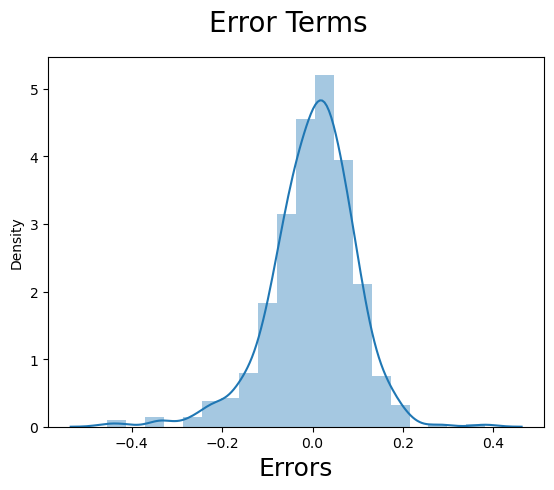

In [348]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train-y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

AS we can see from above histogram, our Residuals are distributed normally, our linear regression is valid.

Thus we can show the linear relationship between X & Y

In [351]:
# Calculate the VIFs for the final model
vif = pd.DataFrame()
vif['Features'] = x_train_new.columns
vif['VIF'] = [variance_inflation_factor(x_train_new.values, i) for i in range(x_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,temp,4.30
2,season_Winter,2.81
0,season_Spring,2.12
10,year,2.07
1,season_Summer,1.94
6,month_Nov,1.79
4,month_Jan,1.65
5,month_Jul,1.59
9,weathersit_Misty,1.56
3,month_Dec,1.47


VIF values are less than 5 which is good and that means there is no multicolinearity.

Now we can making prediction by using the final model

In [354]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              220 non-null    int32  
 1   season_Summer              220 non-null    int32  
 2   season_Winter              220 non-null    int32  
 3   month_Aug                  220 non-null    int32  
 4   month_Dec                  220 non-null    int32  
 5   month_Feb                  220 non-null    int32  
 6   month_Jan                  220 non-null    int32  
 7   month_Jul                  220 non-null    int32  
 8   month_Jun                  220 non-null    int32  
 9   month_Mar                  220 non-null    int32  
 10  month_May                  220 non-null    int32  
 11  month_Nov                  220 non-null    int32  
 12  month_Oct                  220 non-null    int32  
 13  month_Sept                 220 non-null    int32  
 1

In [355]:
#Using scaler over numeric variables, we want to prevent info leaking from train to test dataset
from sklearn.preprocessing import MinMaxScaler

# Refit the scaler using the training data
scaler = MinMaxScaler()
scaler.fit(df_test[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']])  # Match this to your training columns
df_test[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']] = scaler.transform(df_test[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']])

In [356]:
df_test.head()

,season_Spring,season_Summer,season_Winter,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,...,weathersit_Light_snowrain,weathersit_Misty,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148


In [357]:
#Let's divide df_test dataset into x and y group
y_test = df_test.pop('cnt')
x_test = df_test
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season_Spring              220 non-null    int32  
 1   season_Summer              220 non-null    int32  
 2   season_Winter              220 non-null    int32  
 3   month_Aug                  220 non-null    int32  
 4   month_Dec                  220 non-null    int32  
 5   month_Feb                  220 non-null    int32  
 6   month_Jan                  220 non-null    int32  
 7   month_Jul                  220 non-null    int32  
 8   month_Jun                  220 non-null    int32  
 9   month_Mar                  220 non-null    int32  
 10  month_May                  220 non-null    int32  
 11  month_Nov                  220 non-null    int32  
 12  month_Oct                  220 non-null    int32  
 13  month_Sept                 220 non-null    int32  
 1

In [358]:
#Now we need to select variables that were part of final model.
col1=x_train_new.columns
x_test=x_test[col1]
# Adding constant variable to test dataframe
x_test_lm5 = sm.add_constant(x_test)

In [359]:
# Making predictions using the final model

y_pred = lr_5.predict(x_test_lm5)

Finally, evaluating the model

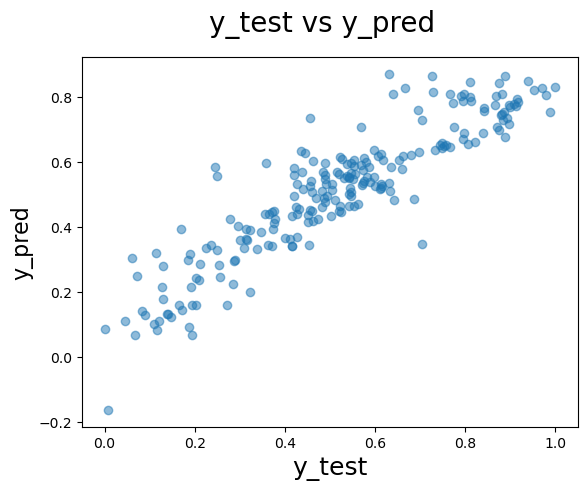

In [361]:
fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

The R² value (R-squared) is a statistical measure used to evaluate the goodness of fit of a regression model. High R² value indicating a better fit. Thus checking it for Test

In [363]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8152400885405646

In [364]:
r2=0.8152400885405646

In [365]:
#Let's get the shape of x_test
x_test.shape

(220, 13)

In [366]:
# n is number of rows in X

n = x_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = x_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8035804824775905

Let's compare our final result

Train R2 from our last model: 0.826; adjusted R2: 0.822

Test R2: 0.815; adjusted R2: 0.804

In [370]:
r2_train=0.826
r2_test=0.815
# Checking the difference between the test-train r2 score 
print('Difference in r2 Score(%)',(-r2_train + r2_test)*100)

Difference in r2 Score(%) -1.100000000000001


In [371]:
Train_Adjusted_R2 = 0.822
Test_Adjusted_R2 = 0.804
# Checking the difference between the test-train Adjusted_R2 score 
print('Difference in Adjusted_R2 Score(%)',(Train_Adjusted_R2-Test_Adjusted_R2)*100)

Difference in Adjusted_R2 Score(%) 1.7999999999999905


model seems to be well-tuned and capable of generalizing to new data, given that the differences in R2 and adjusted R2 between training and test sets are minimal. This indicates that your model has good predictive power and stability.

Conclusion

Temperature (temp):

A coefficient value of 0.4624 indicates that a unit increase in the temperature variable results in an increase in bike hire numbers by 0.4624 units.
This positive coefficient suggests that higher temperatures are associated with more bike bookings, likely due to more favorable weather conditions.

Weather Situation (weathersit_Light_snowrain)

A coefficient value of -0.3060 indicates that a unit increase in the presence of weather conditions like light snow or rain decreases bike hire numbers by 0.3060 units.
This significant negative coefficient reflects that adverse weather conditions lead to fewer bike hires.

    Year 

A coefficient value of 0.2332 shows that a unit increase in the year variable results in an increase in bike hire numbers by 0.2332 units.
This positive impact implies that over time, bike bookings have been increasing, potentially due to rising awareness, improved infrastructure, or greater popularity of bike-sharing services.